In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [8]:
!pip install imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE



In [85]:
df=pd.read_csv('data.csv')

In [86]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [87]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [88]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Churn
No     5174
Yes    1869
Name: Churn, dtype: int64


C:\Users\Welcome\AppData\Local\Temp\ipykernel_13328\861420928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


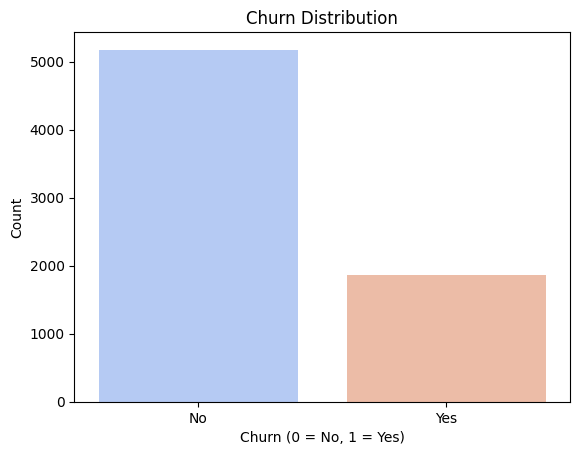

In [91]:
print(df['Churn'].groupby(df['Churn']).count())

sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [92]:
percentages = df['Churn'].value_counts(normalize=True)*100
print(percentages)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [93]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13328\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [94]:
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure']
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,2035.20,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7430.40,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,325.60,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [95]:
labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [96]:
df['customerID']=df['customerID'].str.split('-').str[0].astype(int)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1936.30,0
2,3668,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,107.70,1
3,7795,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1903.50,0
4,9237,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,141.40,1
5,9305,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,797.20,1
6,1452,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1960.20,0
7,6713,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,297.50,0
8,7892,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2934.40,1
9,6388,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3481.30,0


In [97]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
X_test.shape, y_test.shape

((1409, 20), (1409,))

In [99]:
X_train.shape, y_train.shape

((5634, 20), (5634,))

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_sm))

Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



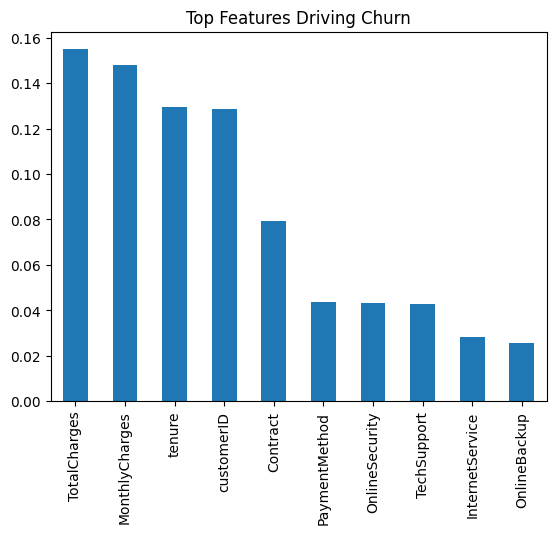

In [103]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind="bar")
plt.title("Top Features Driving Churn")
plt.show()

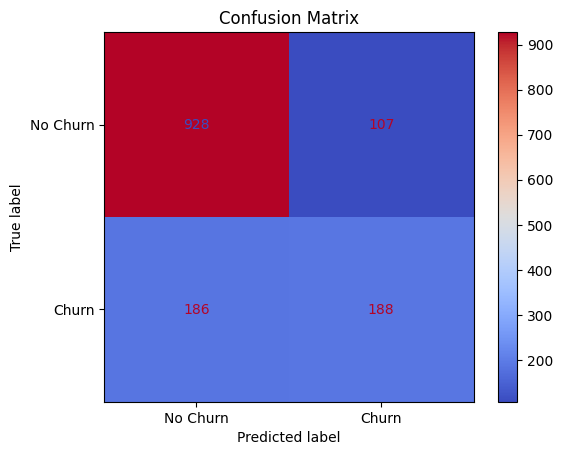

In [104]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()

In [105]:

# # Separate features and target
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [106]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)


In [107]:
X_train_sm.shape, y_train_sm.shape

((8278, 20), (8278,))

In [108]:

# Train model
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predict
y_pred_sm = rf_sm.predict(X_test)
accuracy_sm = accuracy_score(y_test, y_pred_sm)
print(f"SMOTE Model Accuracy: {accuracy_sm:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_sm))

SMOTE Model Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



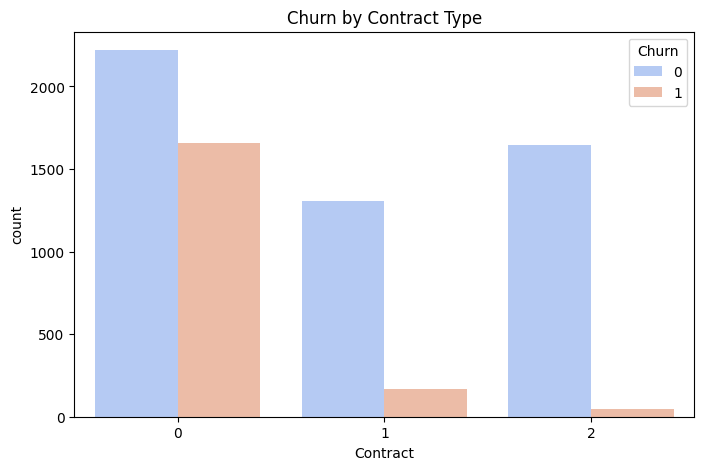

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.show()

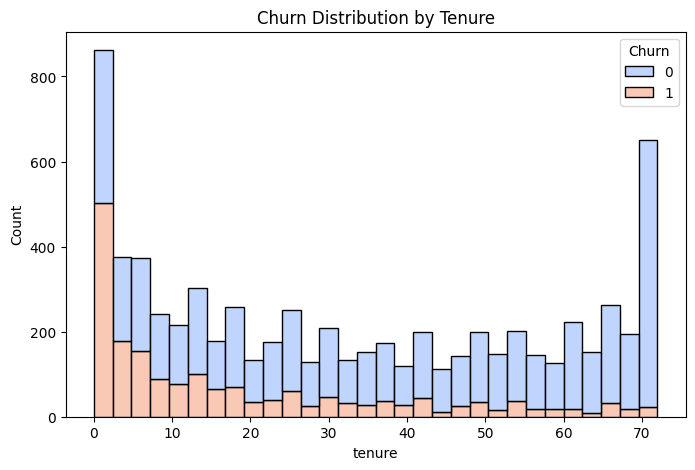

In [110]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="coolwarm")
plt.title("Churn Distribution by Tenure")
plt.show()

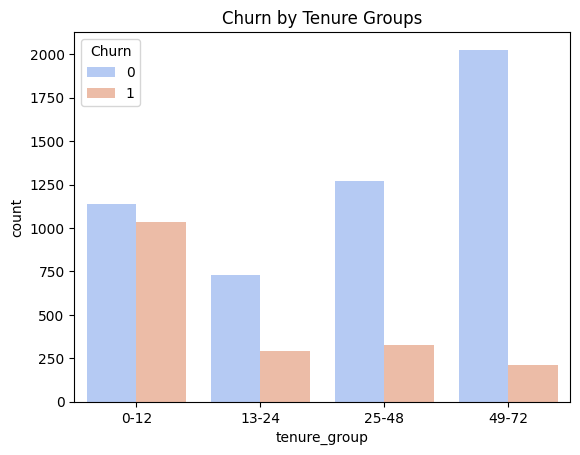

In [111]:
# Tenure bins
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                            labels=["0-12", "13-24", "25-48", "49-72"])

sns.countplot(x='tenure_group', hue='Churn', data=df, palette="coolwarm")
plt.title("Churn by Tenure Groups")
plt.show()


In [112]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: '0-12'

<Figure size 1200x800 with 0 Axes>

C:\Users\Welcome\AppData\Local\Temp\ipykernel_14840\264077309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Revenue', data=df, palette="coolwarm")


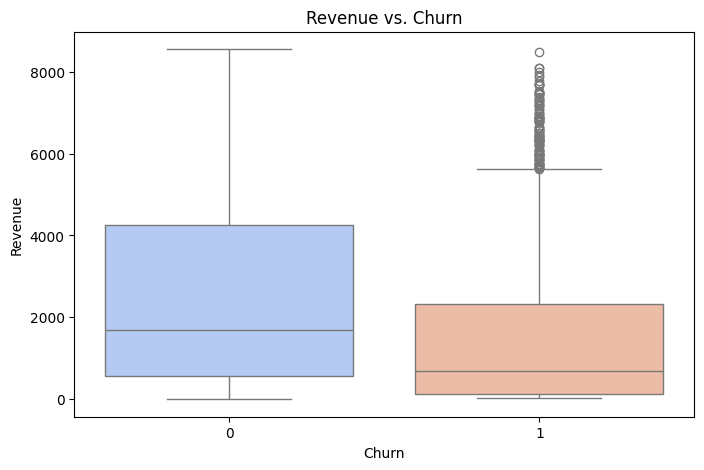

In [ ]:
df['Revenue'] = df['MonthlyCharges'] * df['tenure']

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Revenue', data=df, palette="coolwarm")
plt.title("Revenue vs. Churn")
plt.show()



C:\Users\Welcome\AppData\Local\Temp\ipykernel_13328\2944293587.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(payment_labels)


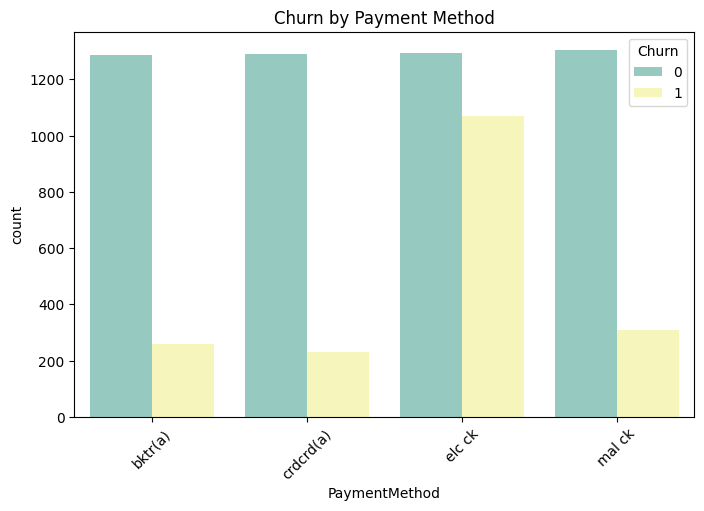

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set3")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
payment_labels = ['bktr(a)', 'crdcrd(a)', 'elc ck', 'mal ck']
plt.gca().set_xticklabels(payment_labels)
plt.show()


# bt(a)-0
# cc(a)-1
# ec-2
# mc-3

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13328\219286197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Revenue", data=df, palette="coolwarm")


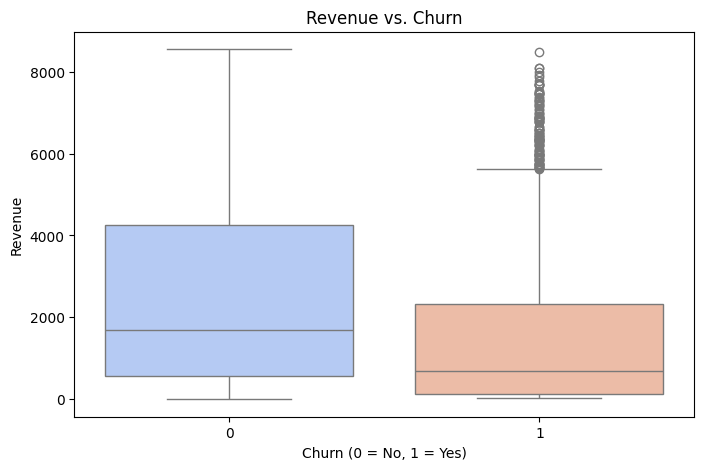

Lost Revenue from Churners: $2,862,577


In [ ]:
df['Revenue'] = df['MonthlyCharges'] * df['tenure']
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Revenue", data=df, palette="coolwarm")
plt.title("Revenue vs. Churn")
plt.show()

lost_revenue = df[df['Churn']==1]['Revenue'].sum()
print(f"Lost Revenue from Churners: ${lost_revenue:,.0f}")

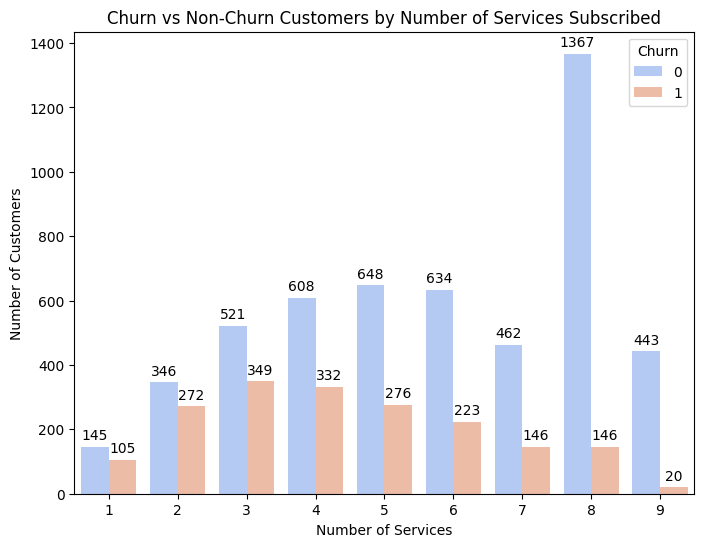

In [153]:
# Define a list of service-related features
service_features = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]




# Copy df
df_binary = df.copy()

# Convert service features to binary flags (1 = has service, 0 = no service)
for col in service_features:
    df_binary[col] = (df_binary[col] != 0).astype(int)

# Calculate number of services per customer
df_binary['NumServices'] = df_binary[service_features].sum(axis=1)

# Group by number of services and churn
churn_by_services = df_binary.groupby(['NumServices','Churn']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(x='NumServices', y='Count', hue='Churn', data=churn_by_services, palette='coolwarm')
plt.title('Churn vs Non-Churn Customers by Number of Services Subscribed')
plt.xlabel('Number of Services')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.ylabel('Number of Customers')
plt.show()


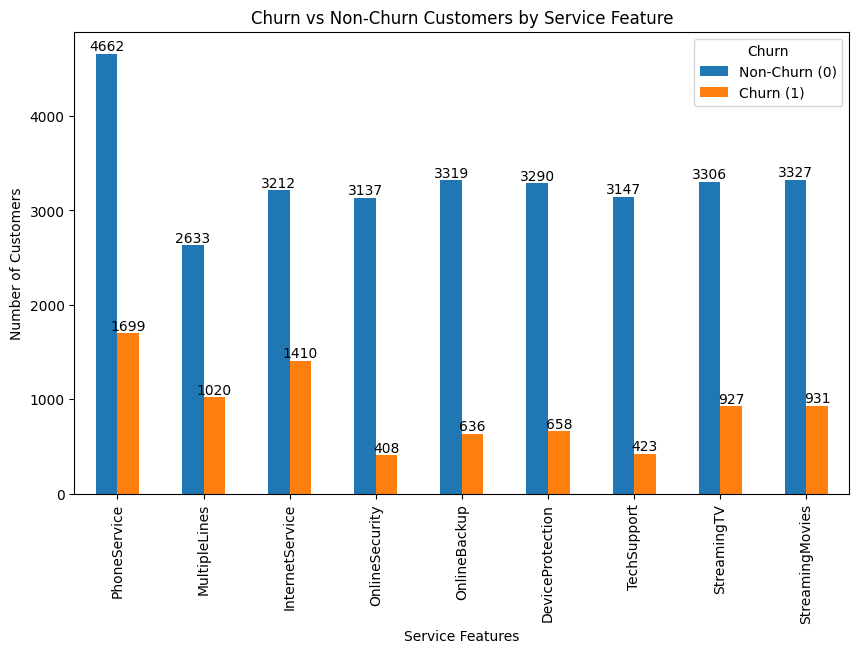

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# list of service features
service_features = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# make sure binary: 1 if service subscribed, else 0
df_binary = df.copy()
for col in service_features:
    df_binary[col] = (df_binary[col] != 0).astype(int)

# calculate churn counts per feature
churn_counts = {}
for col in service_features:
    churn_counts[col] = df_binary.groupby('Churn')[col].sum()

# convert to DataFrame for plotting
churn_df = pd.DataFrame(churn_counts).T

# plot grouped bar chart
ax = churn_df.plot(kind="bar", figsize=(10,6))
plt.title("Churn vs Non-Churn Customers by Service Feature")
plt.xlabel("Service Features")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["Non-Churn (0)", "Churn (1)"])
plt.xticks(rotation=90)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


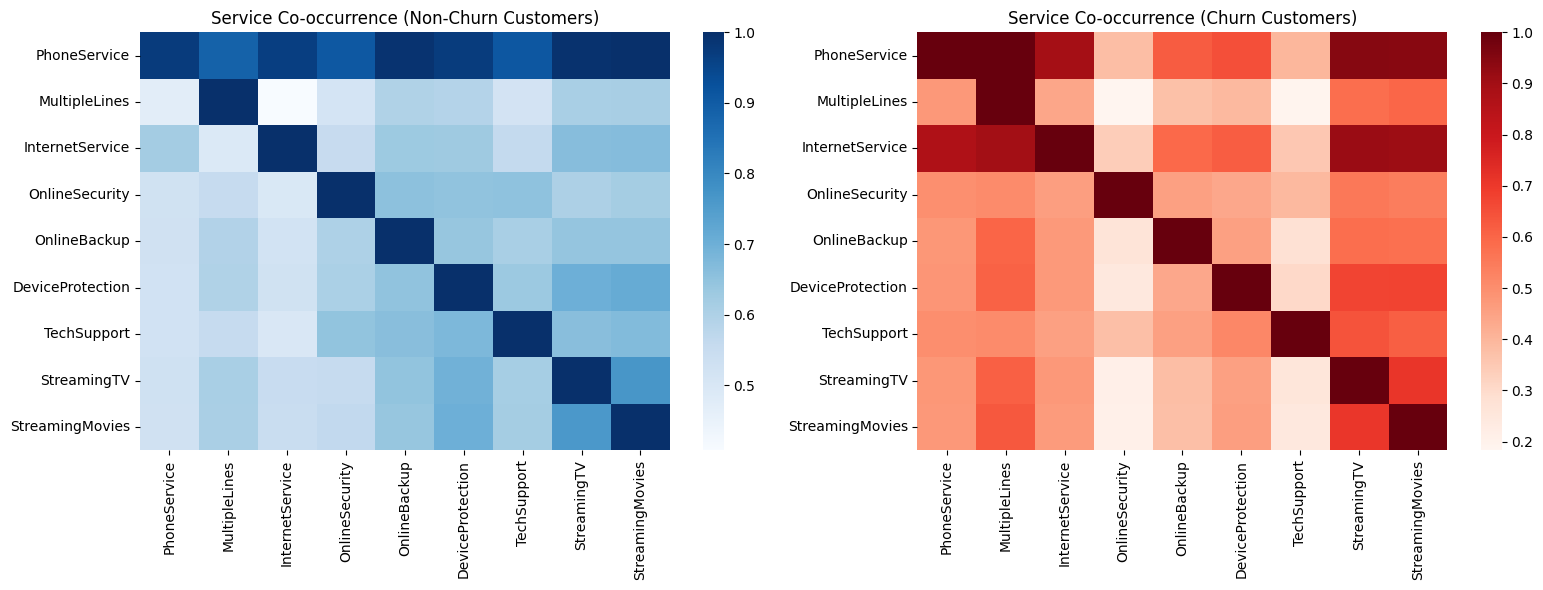

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Service features you provided
service_features = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Assuming df is your dataset and 'Churn' is encoded as 0/1
# Split into churners and non-churners
df_churn = df[df['Churn'] == 1][service_features]
df_nonchurn = df[df['Churn'] == 0][service_features]

# Function to calculate co-occurrence matrix
def co_occurrence(data):
    return data.T.dot(data)

# Co-occurrence matrices
co_churn = co_occurrence(df_churn)
co_nonchurn = co_occurrence(df_nonchurn)

# Normalize by diagonal (to show % instead of counts)
co_churn_norm = co_churn.div(co_churn.max(axis=1), axis=0)
co_nonchurn_norm = co_nonchurn.div(co_nonchurn.max(axis=1), axis=0)

# --- Plot side-by-side heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(co_nonchurn_norm, cmap="Blues", annot=False, ax=axes[0])
axes[0].set_title("Service Co-occurrence (Non-Churn Customers)", fontsize=12)

sns.heatmap(co_churn_norm, cmap="Reds", annot=False, ax=axes[1])
axes[1].set_title("Service Co-occurrence (Churn Customers)", fontsize=12)

plt.tight_layout()
plt.show()


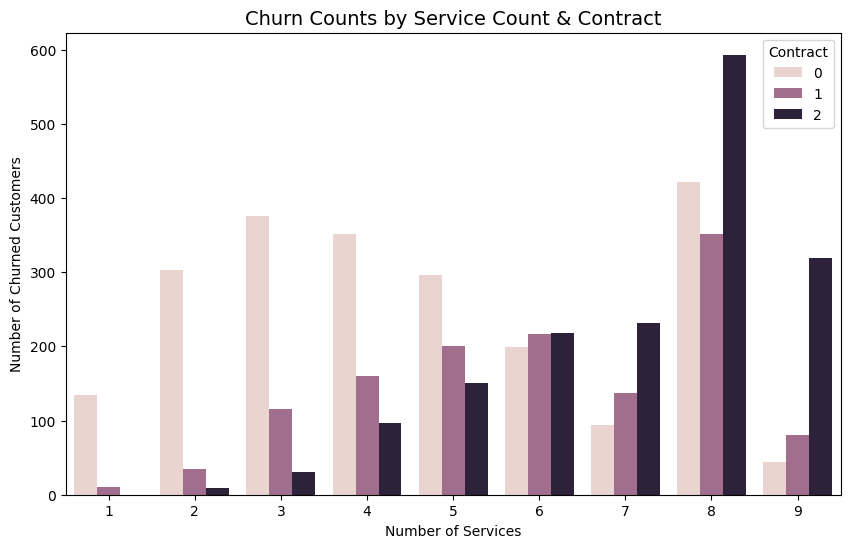

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count active services
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df['ServiceCount'] = (df[service_cols] != 0).astype(int).sum(axis=1)

# Churn COUNT by service count & contract
churn_counts = df[df['Churn'] == 1].groupby(['ServiceCount','Contract']).size().reset_index(name='ChurnCount')

# Grouped bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=churn_counts, x='ServiceCount', y='ChurnCount', hue='Contract')
plt.title("Churn Counts by Service Count & Contract", fontsize=14)
plt.ylabel("Number of Churned Customers")
plt.xlabel("Number of Services")
plt.show()


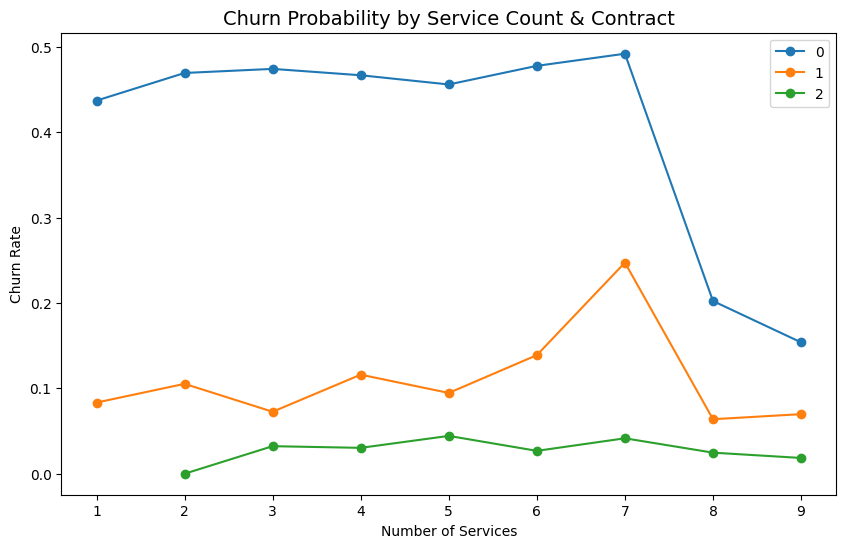

In [149]:
plt.figure(figsize=(10,6))
for contract in df['Contract'].unique():
    subset = churn_rates[churn_rates['Contract'] == contract]
    plt.plot(subset['ServiceCount'], subset['Churn'], marker='o', label=contract)

plt.title("Churn Probability by Service Count & Contract", fontsize=14)
plt.xlabel("Number of Services")
plt.ylabel("Churn Rate")
plt.legend()
plt.show()
